Jaisriram


In [58]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
ds = pd.read_csv('Hyderabad.csv')

In [60]:
ds.head(10)


,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
5,6099000,1230,Nizampet,2,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,7000000,1350,Manikonda,2,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,4198000,1400,Gachibowli,3,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
8,9900000,2240,Tellapur,3,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9800000,1520,Gachibowli,2,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [61]:
ds.dtypes

Price                   int64
Area                    int64
Location               object
No. of Bedrooms         int64
Resale                  int64
MaintenanceStaff        int64
Gymnasium               int64
SwimmingPool            int64
LandscapedGardens       int64
JoggingTrack            int64
RainWaterHarvesting     int64
IndoorGames             int64
ShoppingMall            int64
Intercom                int64
SportsFacility          int64
ATM                     int64
ClubHouse               int64
School                  int64
24X7Security            int64
PowerBackup             int64
CarParking              int64
StaffQuarter            int64
Cafeteria               int64
MultipurposeRoom        int64
Hospital                int64
WashingMachine          int64
Gasconnection           int64
AC                      int64
Wifi                    int64
Children'splayarea      int64
LiftAvailable           int64
BED                     int64
VaastuCompliant         int64
Microwave 

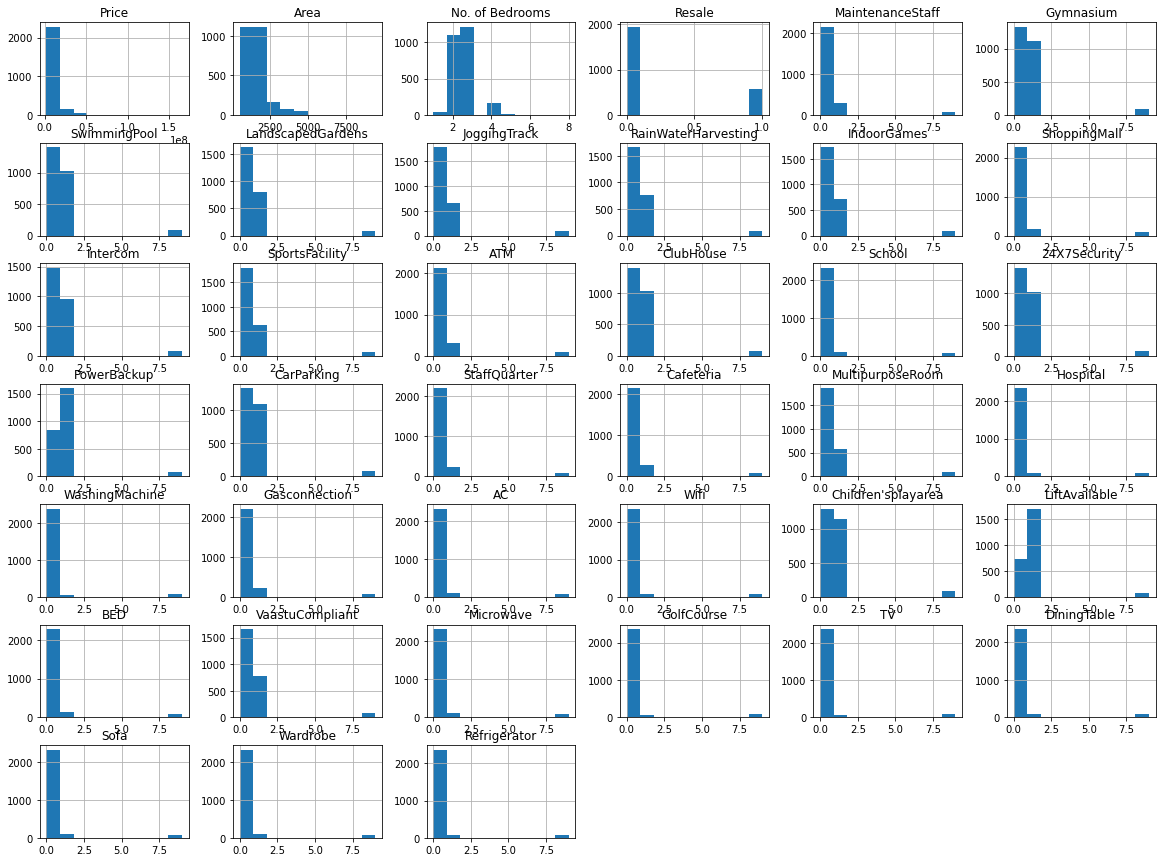

In [62]:
ds.hist(figsize=(20, 15))
plt.show()


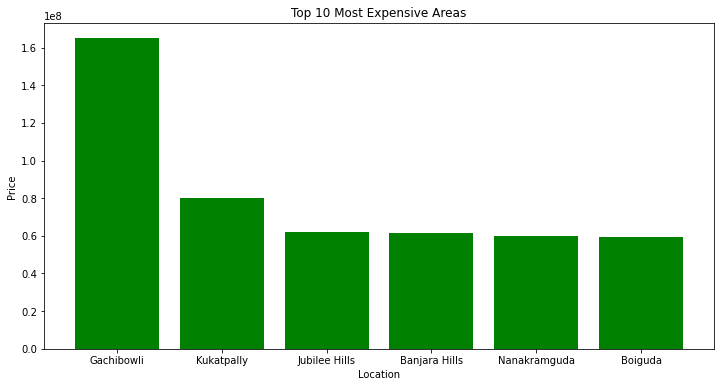

In [63]:
import matplotlib.pyplot as plt

# Sorting the dataset by 'Price' in descending order and select the top 10 rows
top_10_expensive_areas = ds.sort_values(by='Price', ascending=False).head(10)

# Creating a bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_10_expensive_areas['Location'], top_10_expensive_areas['Price'], color='green')
plt.xlabel('Location')
plt.ylabel('Price')
plt.title('Top 10 Most Expensive Areas')
plt.show()


In [64]:
# cost per square foot
ds['Cost_Per_Sqft'] = ds['Price'] / ds['Area']

# Sorting the Dataset by 'Cost_Per_Sqft' in descending order and selecting the top 10 rows
top_10_per_sqft = ds.sort_values(by='Cost_Per_Sqft', ascending=False).head(10)

print(top_10_per_sqft[['Location', 'Cost_Per_Sqft']])


           Location  Cost_Per_Sqft
2385     Gachibowli   60000.000000
2463       Kondapur   30901.287554
2446    Chandanagar   30622.009569
2514      Manikonda   19786.910198
1736       Sun City   16666.666667
2484     Bachupally   16143.106457
2487   Nanakramguda   16064.257028
1884     Somajiguda   15942.028986
2079  Banjara Hills   15272.244356
2470     Masab Tank   15172.413793


Text(0.5, 1.0, 'Correlation Matrix of Numerical Features')

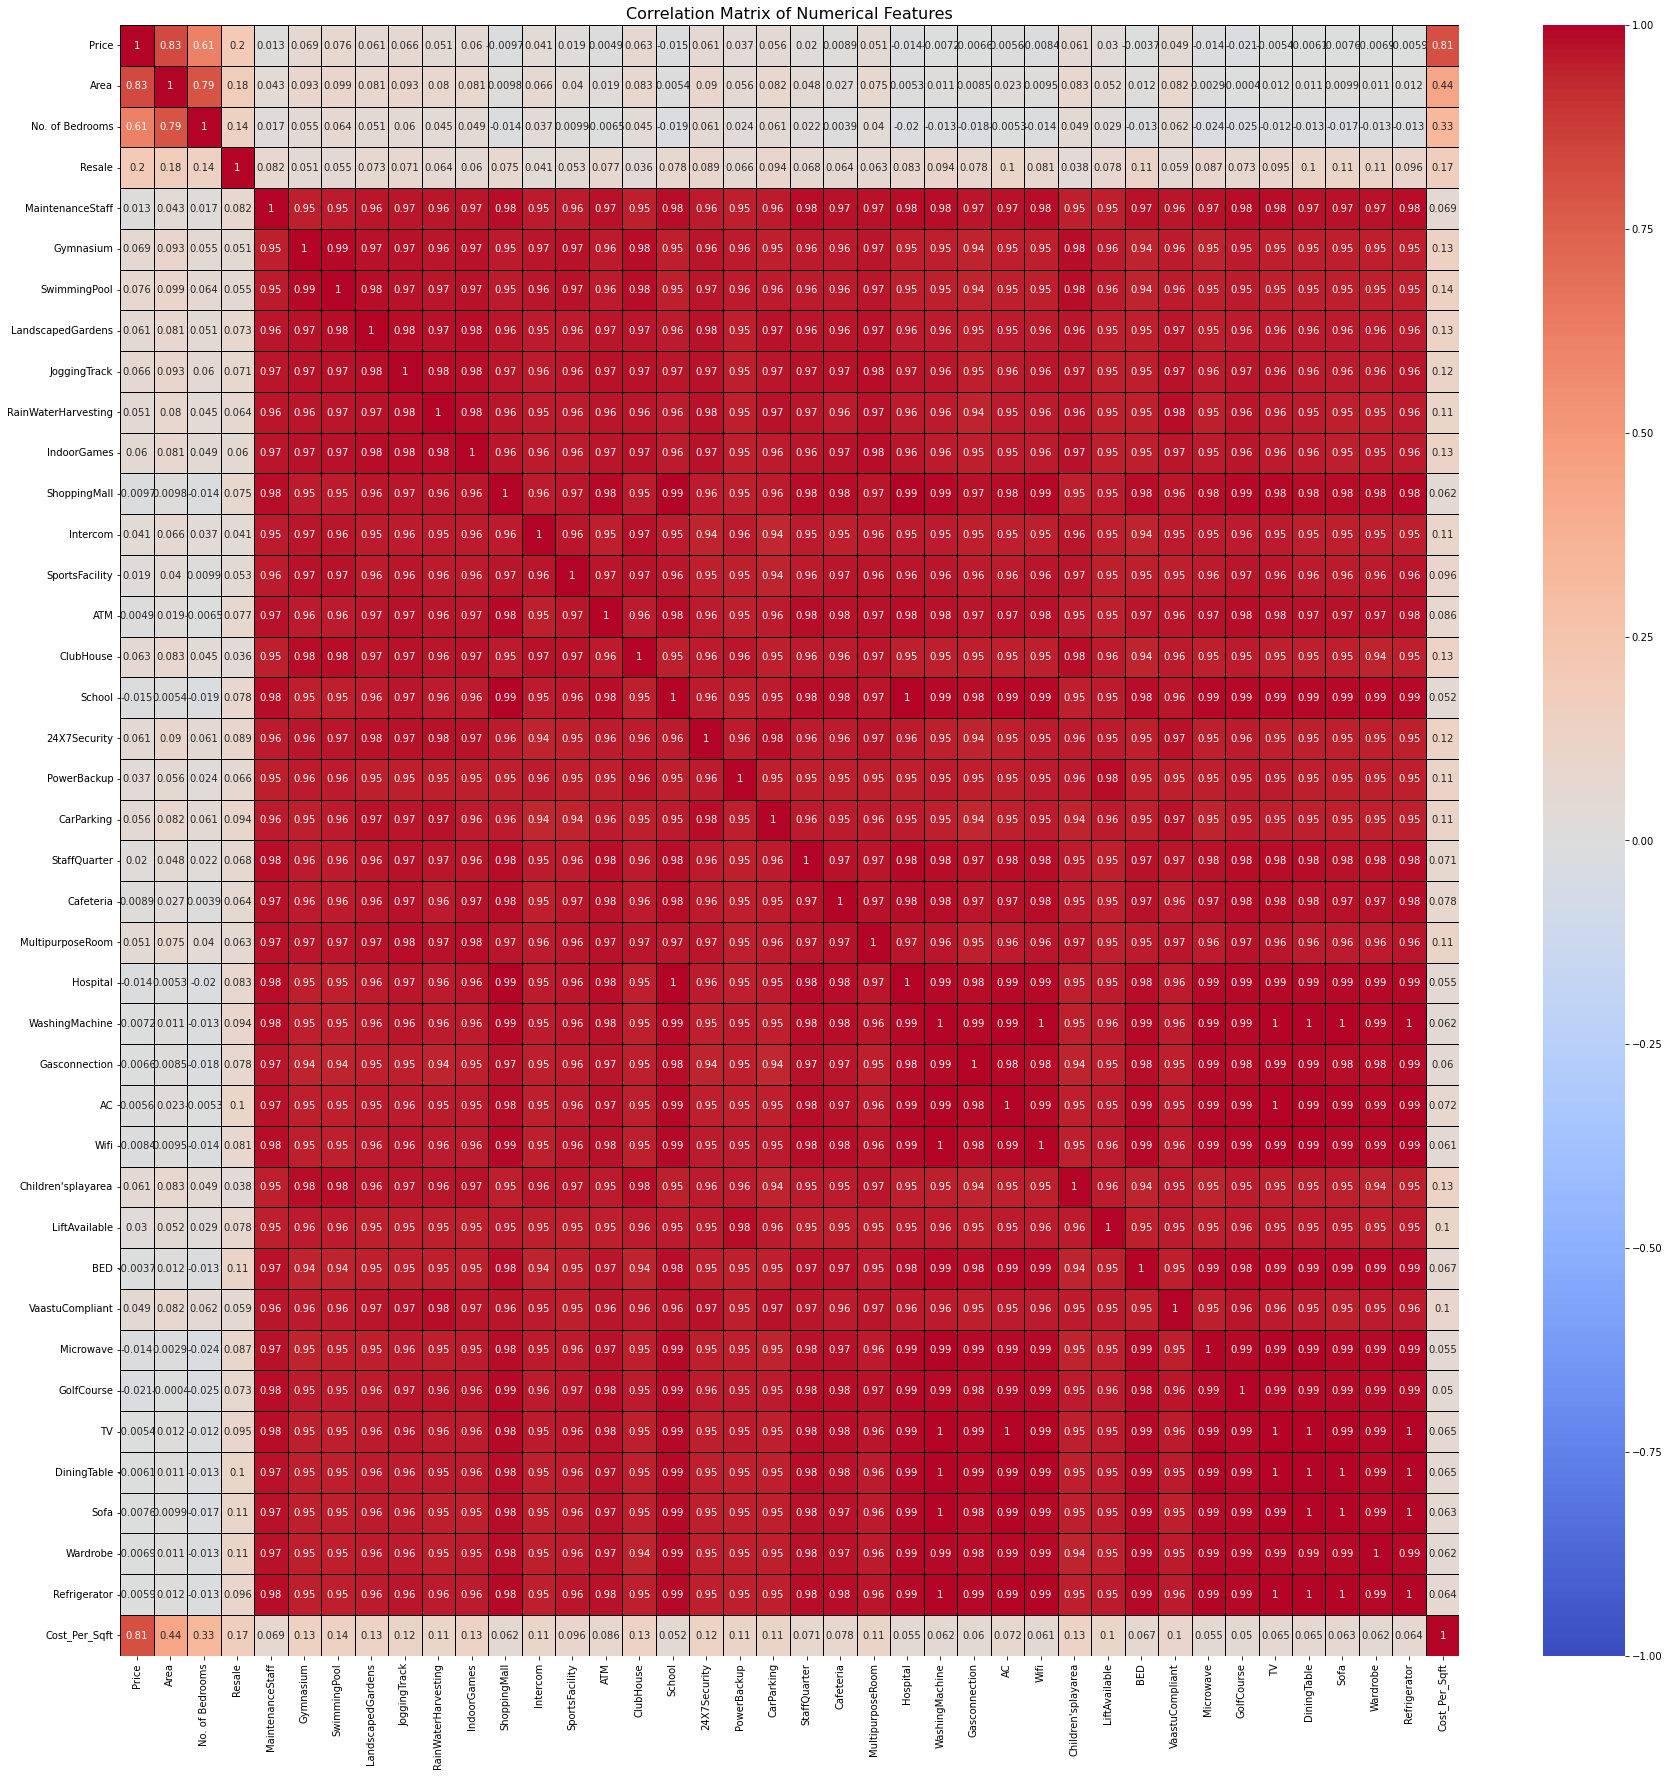

In [37]:
correlation_matrix = ds.corr()
import seaborn as sns
# Plot the correlation matrix using a heatmap
plt.figure(figsize=(30,30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix of Numerical Features', fontsize=16)

<AxesSubplot:>

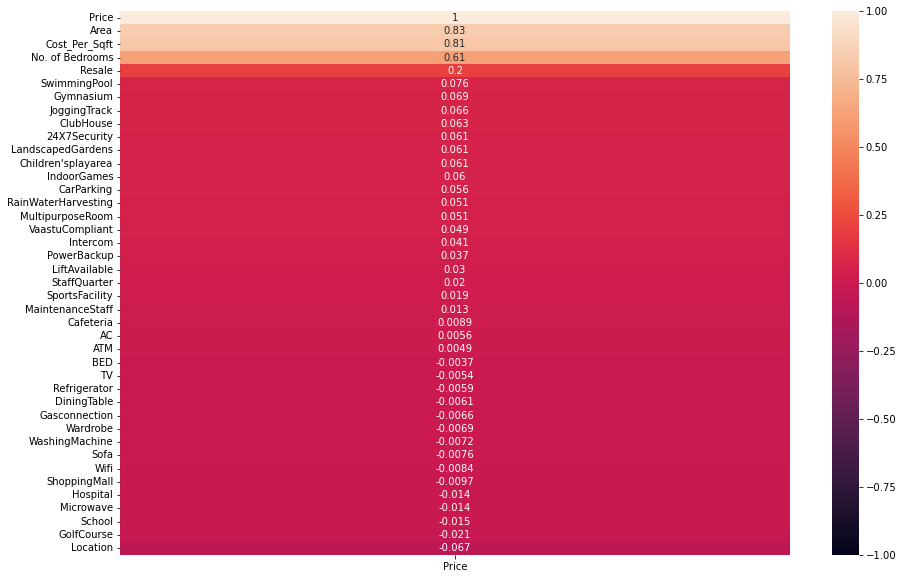

In [68]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
ds['Location'] = label_encoder.fit_transform(ds['Location'])

plt.figure(figsize=(15, 10))  
sns.heatmap(ds.corr()[['Price']].sort_values(by='Price', ascending=False), vmin=-1, vmax=1, annot=True)

In [72]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

X = ds[['Area', 'Location', 'No. of Bedrooms', 'Resale', 'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens', 'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall', 'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School', '24X7Security']]
y = ds['Price']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 1892360.7990946409
Mean Squared Error: 23327704244778.293
R-squared: 0.6300009020182924


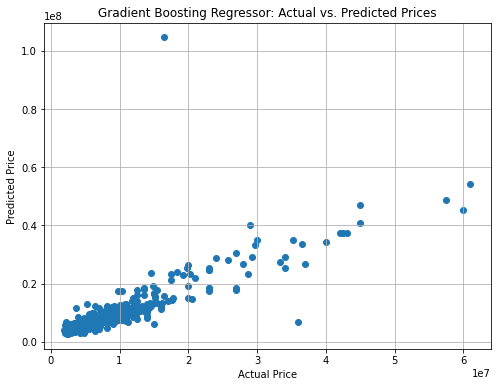

In [71]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values for the Gradient Boosting Regressor
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.title('Gradient Boosting Regressor: Actual vs. Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()


Model Evaluation: Gradient Boosting Regressor

In my data science project, I implemented a Gradient Boosting Regressor to predict housing prices. The model's performance was evaluated using three key metrics:

Mean Absolute Error (MAE): This metric measures the average absolute difference between the predicted prices and the actual prices. The MAE for the model was approximately 1,893,690.55. This means that, on average, the model's predictions had an absolute error of about 1,893,690.55 units of the housing price.

Mean Squared Error (MSE): The MSE calculates the average of the squared differences between the predicted and actual prices. In this case, the MSE was approximately 23,335,871,384,152.13. MSE tends to give more weight to larger errors.

R-squared (R2): R-squared is a measure of how well the model explains the variance in housing prices. The R-squared value was approximately 0.6299, indicating that the model explained approximately 62.99% of the variance in housing prices. A higher R-squared value is generally desirable, as it suggests a better fit for the data.

In interpreting these results, it's important to note that while the model captures a significant portion of the price variability, there is still room for improvement, particularly in reducing prediction errors.

This model evaluation provides valuable insights into the model's performance and its potential for further refinement. It serves as a critical step in assessing the effectiveness of the Gradient Boosting Regressor in predicting housing prices.